In [1]:
# from book:Deep learning with tensorflow. authors: Giancarlo Xaccone, Md.Rezaul Karim, Ahmde Menshawy.
%matplotlib inline
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


PACKAGES LOADED
Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
MNIST LOADED
Start Training
Epoch 00/110 average cost: 0.215783
Start Test
Test label is 0


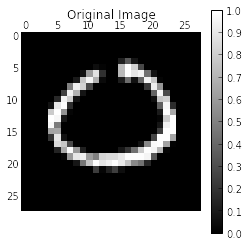

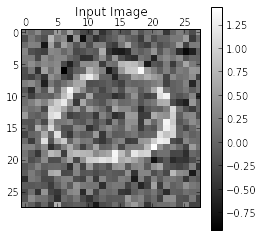

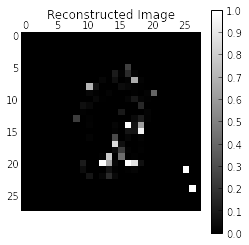

restart Training
Epoch 10/110 average cost: 0.034155
Start Test
Test label is 9


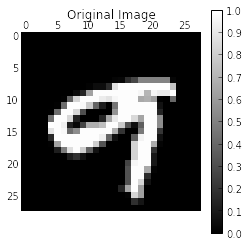

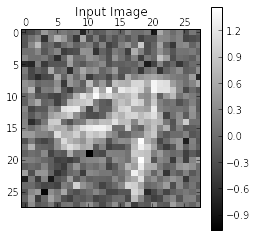

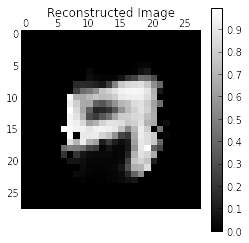

restart Training
Epoch 20/110 average cost: 0.027336
Start Test
Test label is 8


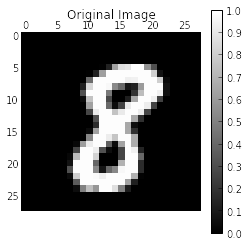

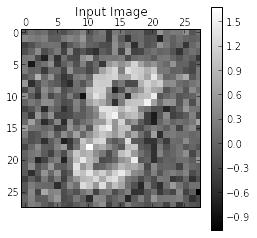

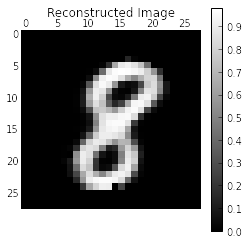

restart Training
Epoch 30/110 average cost: 0.023995
Start Test
Test label is 1


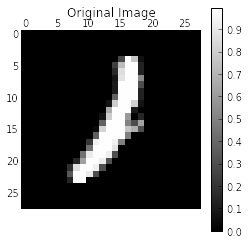

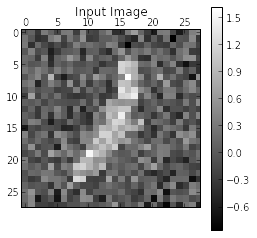

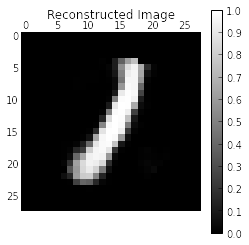

restart Training


KeyboardInterrupt: 

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
#Plot function
def plotresult(org_vec,noisy_vec,out_vec):
   plt.matshow(np.reshape(org_vec, (28, 28)), cmap=plt.get_cmap('gray'))
   plt.title("Original Image")
   plt.colorbar()
   plt.matshow(np.reshape(noisy_vec, (28, 28)), cmap=plt.get_cmap('gray'))
   plt.title("Input Image")
   plt.colorbar()
   outimg   = np.reshape(out_vec, (28, 28))
   plt.matshow(outimg, cmap=plt.get_cmap('gray'))
   plt.title("Reconstructed Image")
   plt.colorbar()
   plt.show()

# NETOWORK PARAMETERS
n_input    = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_output   = 784
epochs     = 110
batch_size = 100
disp_step  = 10
print ("PACKAGES LOADED")
mnist = input_data.read_data_sets('data/', one_hot=True)
trainimg   = mnist.train.images
trainlabel = mnist.train.labels
testimg    = mnist.test.images
testlabel  = mnist.test.labels
print ("MNIST LOADED")
# PLACEHOLDERS
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_output])
dropout_keep_prob = tf.placeholder("float")
# WEIGHTS
weights = {
       'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
       'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
       'out': tf.Variable(tf.random_normal([n_hidden_2, n_output]))
}
biases = {
       'b1': tf.Variable(tf.random_normal([n_hidden_1])),
       'b2': tf.Variable(tf.random_normal([n_hidden_2])),
       'out': tf.Variable(tf.random_normal([n_output]))
}
encode_in = tf.nn.sigmoid\
         (tf.add(tf.matmul\
                 (x, weights['h1']),\
                 biases['b1']))
encode_out = tf.nn.dropout\
            (encode_in, dropout_keep_prob)
decode_in = tf.nn.sigmoid\
         (tf.add(tf.matmul\
                 (encode_out, weights['h2']),\
                 biases['b2']))
decode_out = tf.nn.dropout(decode_in,\
                          dropout_keep_prob)
y_pred = tf.nn.sigmoid\
        (tf.matmul(decode_out,\
                   weights['out']) +\
         biases['out'])
# COST
cost = tf.reduce_mean(tf.pow(y_pred - y, 2))
# OPTIMIZER
optmizer = tf.train.RMSPropOptimizer(0.01).minimize(cost)
# INITIALIZER
init = tf.global_variables_initializer()
# Launch the graph
with tf.Session() as sess:
   sess.run(init)
   print ("Start Training")
   for epoch in range(epochs):
       num_batch  = int(mnist.train.num_examples/batch_size)
       total_cost = 0.
       for i in range(num_batch):
           batch_xs, batch_ys = mnist.train.next_batch(batch_size)
           batch_xs_noisy = batch_xs\
                            + 0.3*np.random.randn(batch_size, 784)
           feeds = {x: batch_xs_noisy,\
                    y: batch_xs,\
                    dropout_keep_prob: 0.8}
           sess.run(optmizer, feed_dict=feeds)
           total_cost += sess.run(cost, feed_dict=feeds)
       # DISPLAY
       if epoch % disp_step == 0:
           print ("Epoch %02d/%02d average cost: %.6f"
                  % (epoch, epochs, total_cost/num_batch))
           # Test one
           print ("Start Test")
           randidx = np.random.randint(testimg.shape[0], size=1)
           orgvec = testimg[randidx, :]
           testvec = testimg[randidx, :]
           label = np.argmax(testlabel[randidx, :], 1)
           print ("Test label is %d" % (label))
           noisyvec = testvec + 0.3*np.random.randn(1, 784)
           outvec   = sess.run(y_pred,\
                               feed_dict={x: noisyvec,\
                                          dropout_keep_prob: 1})
           plotresult(orgvec,noisyvec,outvec)
           print ("restart Training")
